<h2>CS 4780/5780 Final Project: </h2>
<h3>COVID-19 Hospitalizations Prediction for EU Countries</h3>

Names and NetIDs for your group members:

<h3>Introduction:</h3>

<p> The final project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The programming project provide templates for how to do this, and the most recent video lectures summarize some of the tricks you will need (e.g. feature normalization, feature construction). So, this final project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is predicting hospitalizations due to COVID-19. Although hospitalizations are directly related to COVID-19 cases, the different populations, timelines and reactionary measures of different EU countries result in different trends in hospitalization numbers. In this project you will bring the power of machine learning to make predictions for the country-level hospitalizations using COVID-19 age group case data and also previous hospitalization data. There will be two tasks, one will be a basic problem that will require you to use methods learned in class. The second task will be more difficult and will require some additional intuition and insight. <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 1: Basics</h2><p>

<h3>1.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [9]:
#one hot encoded countries
#removed the date week column
#standard scaler of the number of cases, and daily occupancies
#removed the date column

In [1]:
#imported liabraries
!pip install seaborn
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# TODO

<h3>1.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy and mean squared error (MSE). As a recap, accuracy is the percent of labels you predict correctly and MSE is the average squared difference between the estimated values and the actual value. To measure this, you can use library functions from sklearn. A simple example is shown below. 
<p>

In [2]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.42857142857142855

In [3]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

2.857142857142857

<h2>Part 2: Baseline Solution</h2><p>
Note that your code should be commented well and in part 2.4 you can refer to your comments.

<h3>2.1 Preprocessing and Feature Extraction:</h3><p>
Given the training dataset and graph information, you need to correctly preprocess the dataset (e.g. feature normalization). Think of what modifications can be done to the data to make it more easily interpretable.
<p>

In [4]:
# You may change this but we suggest loading data with the following code and you may need to change
# datatypes and do necessary data transformation after loading the raw data to the dataframe.
df = pd.read_csv('train_baseline.csv', sep=',')
df_copy = df.copy()
test = pd.read_csv('test_baseline_no_label.csv',sep = ',')
test_copy = test.copy()
test.head(5)

# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO

,country,date,year_week,Daily hospital occupancy,under_15_cases,15-24_cases,25-49_cases,50-64_cases,65-79_cases,over_80_cases
0,Belgium,9/7/2020,2020-W37,235,773,1325,2649,904,350,143
1,Belgium,9/8/2020,2020-W37,260,773,1325,2649,904,350,143
2,Belgium,9/9/2020,2020-W37,250,773,1325,2649,904,350,143
3,Belgium,9/10/2020,2020-W37,249,773,1325,2649,904,350,143
4,Belgium,9/11/2020,2020-W37,254,773,1325,2649,904,350,143


In [5]:
#standardidization using standard scaler and transforming that to the test set once applied to the training model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_copy[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases']]=scaler.fit_transform(df_copy[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases']])
print(df_copy.head(15))

test_copy[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases']]=scaler.transform(test_copy[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases']])
print(test_copy.head(15))
#test_copy.head(15)
#df = df[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases','Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       #'Iceland', 'Ireland', 'Italy', 'Lithuania', 'Netherlands',
       #'Norway', 'Portugal', 'Slovenia', 'Spain','year','month','day','week','next_week_increase_decrease']]
#df.head(15)

    country       date year_week  Daily hospital occupancy  under_15_cases  \
0   Belgium  3/15/2020  2020-W11                 -0.351214       -0.369019   
1   Belgium  3/16/2020  2020-W12                 -0.332702       -0.367305   
2   Belgium  3/17/2020  2020-W12                 -0.311422       -0.367305   
3   Belgium  3/18/2020  2020-W12                 -0.284951       -0.367305   
4   Belgium  3/19/2020  2020-W12                 -0.251387       -0.367305   
5   Belgium  3/20/2020  2020-W12                 -0.205019       -0.367305   
6   Belgium  3/21/2020  2020-W12                 -0.157268       -0.367305   
7   Belgium  3/22/2020  2020-W12                 -0.109344       -0.367305   
8   Belgium  3/23/2020  2020-W13                 -0.070935       -0.366162   
9   Belgium  3/24/2020  2020-W13                 -0.015398       -0.366162   
10  Belgium  3/25/2020  2020-W13                  0.074049       -0.366162   
11  Belgium  3/26/2020  2020-W13                  0.141523      

In [6]:
test_copy.head(10)

,country,date,year_week,Daily hospital occupancy,under_15_cases,15-24_cases,25-49_cases,50-64_cases,65-79_cases,over_80_cases
0,Belgium,9/7/2020,2020-W37,-0.356059,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
1,Belgium,9/8/2020,2020-W37,-0.351733,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
2,Belgium,9/9/2020,2020-W37,-0.353464,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
3,Belgium,9/10/2020,2020-W37,-0.353637,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
4,Belgium,9/11/2020,2020-W37,-0.352772,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
5,Belgium,9/12/2020,2020-W37,-0.351733,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
6,Belgium,9/13/2020,2020-W37,-0.346024,-0.155286,-0.108735,-0.226130,-0.297705,-0.324575,-0.357292
7,Belgium,9/14/2020,2020-W38,-0.341699,-0.034989,0.146106,-0.111461,-0.213007,-0.258805,-0.294680
8,Belgium,9/15/2020,2020-W38,-0.342218,-0.034989,0.146106,-0.111461,-0.213007,-0.258805,-0.294680
9,Belgium,9/16/2020,2020-W38,-0.335643,-0.034989,0.146106,-0.111461,-0.213007,-0.258805,-0.294680


In [ ]:
#function defined for cleaning and converting date and time columns 

In [16]:
def cleaning_train(test):
    #dropped year_week column
    test = test.drop(['year_week'], axis=1)
     #ask harsh about this 
   #seems like training set has nore increase than decreased values by week
    encoded_columns = pd.get_dummies(test['country'])
    #ask harsh about this 
    test= test.join(encoded_columns).drop('country', axis=1)
    test['date'] = pd.to_datetime(test['date'])
    #test['year'] = test['date'].dt.year
    test['month'] = test['date'].dt.month
    test['day'] = test['date'].dt.day
    test['week'] = test['date'].dt.week
    test = test.drop(['date'], axis=1)
    return test
     
   


In [17]:
#running function on test and train data
df_final_processing = cleaning_train(df_copy)
df_final_processing = df_final_processing[['Daily hospital occupancy','under_15_cases','15-24_cases','25-49_cases','50-64_cases','65-79_cases','over_80_cases','Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Iceland', 'Ireland', 'Italy', 'Lithuania', 'Netherlands',
       'Norway', 'Portugal', 'Slovenia', 'Spain','month','day','week','next_week_increase_decrease']]
df_final_processing.head(15)
#df_test_processing = cleaning_train(test_copy)
test_processing = cleaning_train(test_copy)
print(test_processing)
print(df_final_processing)

      Daily hospital occupancy  under_15_cases  15-24_cases  25-49_cases  \
0                    -0.356059       -0.155286    -0.108735    -0.226130   
1                    -0.351733       -0.155286    -0.108735    -0.226130   
2                    -0.353464       -0.155286    -0.108735    -0.226130   
3                    -0.353637       -0.155286    -0.108735    -0.226130   
4                    -0.352772       -0.155286    -0.108735    -0.226130   
...                        ...             ...          ...          ...   
1139                  1.315409        1.038823     0.610040     0.490809   
1140                  1.292053        1.029679     0.552111     0.490409   
1141                  1.226308        1.029679     0.552111     0.490409   
1142                  1.180460        1.029679     0.552111     0.490409   
1143                  1.118695        1.029679     0.552111     0.490409   

      50-64_cases  65-79_cases  over_80_cases  Belgium  Croatia  Cyprus  ...  \
0      

C:\Anaconda\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [18]:
#this is to randomly shuffle the training set, and split it into train and validation set
feature_names = [f'{i}' for i in df_final_processing.columns]
final_features = feature_names[0:25]
df_final_processing = df_final_processing.sample(n=len(df_final_processing),random_state= 42)

df_final_processing = df_final_processing.reset_index(drop =True)
df_valid = df_final_processing.sample(frac= 0.3,random_state = 42)
df_train = df_final_processing.drop(df_valid.index)
X_train = df_train.iloc[:,0:25].values
X_valid = df_valid.iloc[:,0:25].values
y_train = df_train.iloc[:,-1].values
y_valid = df_valid.iloc[:,-1].values



In [30]:
#imported random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 24, n_estimators=100, random_state = 42,oob_score = True )
print(rf.get_params())
rf.fit(X_train, y_train)
#used the final_predict for submission
final_predict = rf.predict(test_processing)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [24]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]


In [25]:
#i used this code from online to understand the roc_auc_Score,and what exactly it does
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
 # calculates specificity
 return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    return auc, accuracy, recall, precision, specificity

In [26]:
thresh = 0.101
print_report(y_train,y_train_preds,thresh)
#print_report(y_valid, y_valid_preds, thresh)

(1.0, 0.9347436357117246, 1.0, 0.872816212438854, 0.8818181818181818)

No handles with labels found to put in legend.


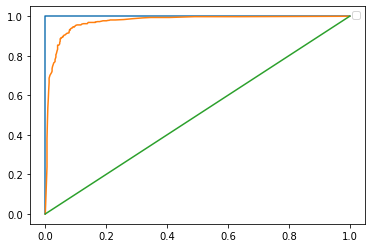

In [27]:
from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_valid, tpr_valid)
plt.plot([0,1],[0,1])
plt.legend()
plt.show()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

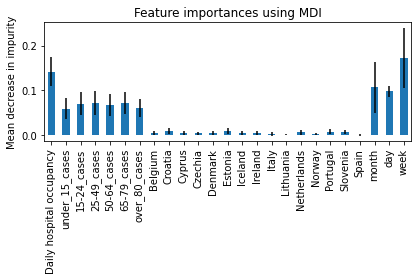

In [28]:
import pandas as pd
forest_importances = pd.Series(importances, index=final_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h3>2.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 1.1.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO



<h3>2.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO

<h3>2.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

2.4.1 How did you preprocess the dataset and features, and how did you formulate the learning problem (or problems)?

2.4.2 Which two learning methods from class did you choose and why did you made the choices?

2.4.3 How did you do the model selection?

2.4.4 Does the test performance reach a given baseline 70% performance? (Please include a screenshot of Kaggle Submission)

<h2>Part 3: Creative Solution</h2><p>

<h3>3.1 Open-ended Code:</h3><p>
You may follow the steps in part 2 again but making innovative changes like creating/using new features, using new training algorithms, etc. Make sure you explain everything clearly in part 3.2. Note that reaching the 150k MSE creative baseline is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

In [ ]:
# Make sure you comment your code clearly and you may refer to these comments in the part 3.2
# TODO

<h3>3.2 Explanation in Words:</h3><p>

You need to answer the following questions in a markdown cell after this cell:

3.2.1 How much did you manage to improve performance on the test set? Did you reach the 150k MSE for the test in Kaggle? (Please include a screenshot of Kaggle Submission)

3.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

<h2>Part 4: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The CSV shall contain TWO columns. The first column should be named "country_id" and be a concatenation of the country and date in the first two columns of the test_no_label.csv. This is because for the Kaggle competition we need a unique identifier for every row. For instance, the first entry should be "Belgium 9/7/2020". The second column of the prediction csv should have the same name as the target metric (either "next_week_increase_decrease" or "next_week_hospitalizations") with your generated predictions. Your file should have 1144 total rows excluding the column names. The order should be the same as in the test_baseline/creative_no_label.csv. A sample predication file can be downloaded from Kaggle for each problem.

In [ ]:
# TODO
#the submission file is the template that they posted
final_submission = pd.read_csv('submission.csv')
#this updated the next_Week_increase_Decrease witht the output of final_predicts
final_submission['next_week_increase_decrease'] = final_predict
#saves this to submission_final
final_submission.to_csv('submission_final.csv',index = False)
# You may use pandas to generate a dataframe with country, date and your predictions first 
# and then use to_csv to generate a CSV file.


<h2>Part 5: Resources and Literature Used</h2><p>